## Model Prediksi Deret Waktu LSTM-RNN

In [1]:
# => Deklarasi class
from ipynb.fs.full.class_akuisisi_data import *
from ipynb.fs.full.class_praproses_data import *
from ipynb.fs.full.class_visualisasi_data import *
from ipynb.fs.full.class_lstm_rnn import *

In [2]:
# membaca dataset
dataset = load_dataset_excel("dataset.xlsx", "dataset")

In [3]:
# set index tanggal
dataset = dataset.set_index("tanggal")

In [4]:
# set informasi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2001-01-31 to 2020-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sst             240 non-null    float64
 1   soi             240 non-null    float64
 2   oni             240 non-null    float64
 3   hotspot_riau    240 non-null    int64  
 4   hotspot_sumsel  240 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.2 KB


In [5]:
# menampilkan dataset
print(dataset)

             sst  soi   oni  hotspot_riau  hotspot_sumsel
tanggal                                                  
2001-01-31 -0.83  1.6 -0.68            17               3
2001-02-28 -0.61  2.8 -0.52           159               5
2001-03-31 -0.38  1.5 -0.44           479              10
2001-04-30 -0.26  0.3 -0.34            45              20
2001-05-31 -0.25 -0.8 -0.25            81              39
...          ...  ...   ...           ...             ...
2020-08-31 -0.64  1.8 -0.57           107              65
2020-09-30 -0.95  1.5 -0.89            31              29
2020-10-31 -1.39  0.8 -1.16            42              40
2020-11-30 -1.31  1.1 -1.28            25              30
2020-12-31 -1.04  3.0 -1.28            35               8

[240 rows x 5 columns]


### Studi kasus wilayah Sumatra Selatan

In [6]:
# memilih area studi
df_sumsel = dataset[["hotspot_sumsel", "sst", "soi", "oni"]]

In [7]:
print(df_sumsel)

            hotspot_sumsel   sst  soi   oni
tanggal                                    
2001-01-31               3 -0.83  1.6 -0.68
2001-02-28               5 -0.61  2.8 -0.52
2001-03-31              10 -0.38  1.5 -0.44
2001-04-30              20 -0.26  0.3 -0.34
2001-05-31              39 -0.25 -0.8 -0.25
...                    ...   ...  ...   ...
2020-08-31              65 -0.64  1.8 -0.57
2020-09-30              29 -0.95  1.5 -0.89
2020-10-31              40 -1.39  0.8 -1.16
2020-11-30              30 -1.31  1.1 -1.28
2020-12-31               8 -1.04  3.0 -1.28

[240 rows x 4 columns]


In [8]:
# ensure all data is float
values = df_sumsel.values
values = values.astype('float32')

### Normalisasi dan Supervised learning

In [9]:
# normalisasi max-min
scaled = normalisasi_max_min(values)

In [10]:
# supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [11]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)

In [12]:
values = reframed.values

### Data latih dan Data uji

In [13]:
# split into train and test sets
train_size = int(len(values) * 0.8)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(values),:]

In [14]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [15]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [16]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(191, 1, 4) (191,) (48, 1, 4) (48,)


### Model prediksi LSTM-RNN

- Sigmoid

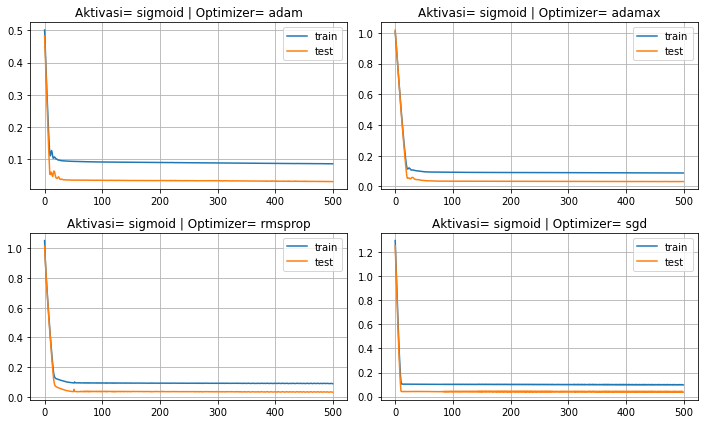

In [17]:
# deklarasi fungsi aktivasi
act_func = ['sigmoid']

# deklarasi fungsi optimizer
act_opt = ['adam','adamax','rmsprop','sgd']


# membuat frame 
plt.figure(figsize=(10,6))

# inisialisasi perulangan
k = 0

# perulangan bersarang
for i in range(len(act_func)):
    for j in range(len(act_opt)):
        
        # increment 
        k+=1
        
        # subploting
        plt.subplot(2,2, k)
        plt.tight_layout()

        # call model loss
        model_loss1(train_X, train_y, test_X, test_y, act_func[i], act_opt[j])

# menampilkan hasil visualsasi
plt.show()

- Tanh

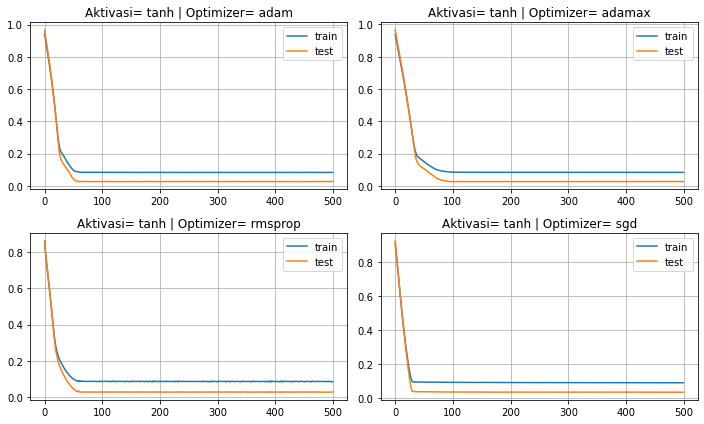

In [18]:
# deklarasi fungsi aktivasi
act_func = ['tanh']

# deklarasi fungsi optimizer
act_opt = ['adam','adamax','rmsprop','sgd']


# membuat frame 
plt.figure(figsize=(10,6))

# inisialisasi perulangan
k = 0

# perulangan bersarang
for i in range(len(act_func)):
    for j in range(len(act_opt)):
        
        # increment 
        k+=1
        
        # subploting
        plt.subplot(2,2, k)
        plt.tight_layout()

        # call model loss
        model_loss1(train_X, train_y, test_X, test_y, act_func[i], act_opt[j])

# menampilkan hasil visualsasi
plt.show()

- ReLU

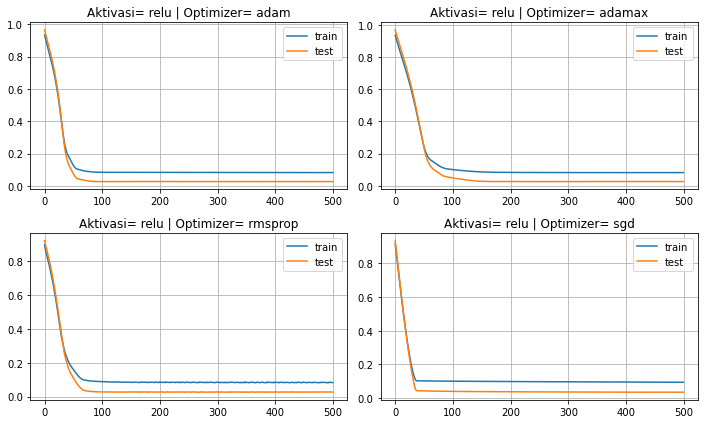

In [19]:
# deklarasi fungsi aktivasi
act_func = ['relu']

# deklarasi fungsi optimizer
act_opt = ['adam','adamax','rmsprop','sgd']


# membuat frame 
plt.figure(figsize=(10,6))

# inisialisasi perulangan
k = 0

# perulangan bersarang
for i in range(len(act_func)):
    for j in range(len(act_opt)):
        
        # increment 
        k+=1
        
        # subploting
        plt.subplot(2,2, k)
        plt.tight_layout()

        # call model loss
        model_loss1(train_X, train_y, test_X, test_y, act_func[i], act_opt[j])

# menampilkan hasil visualsasi
plt.show()

- Selu

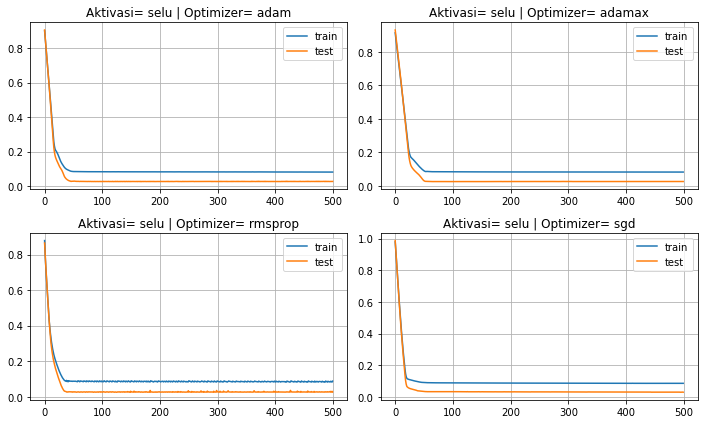

In [20]:
# deklarasi fungsi aktivasi
act_func = ['selu']

# deklarasi fungsi optimizer
act_opt = ['adam','adamax','rmsprop','sgd']


# membuat frame 
plt.figure(figsize=(10,6))

# inisialisasi perulangan
k = 0

# perulangan bersarang
for i in range(len(act_func)):
    for j in range(len(act_opt)):
        
        # increment 
        k+=1
        
        # subploting
        plt.subplot(2,2, k)
        plt.tight_layout()

        # call model loss
        model_loss1(train_X, train_y, test_X, test_y, act_func[i], act_opt[j])

# menampilkan hasil visualsasi
plt.show()

- ELU

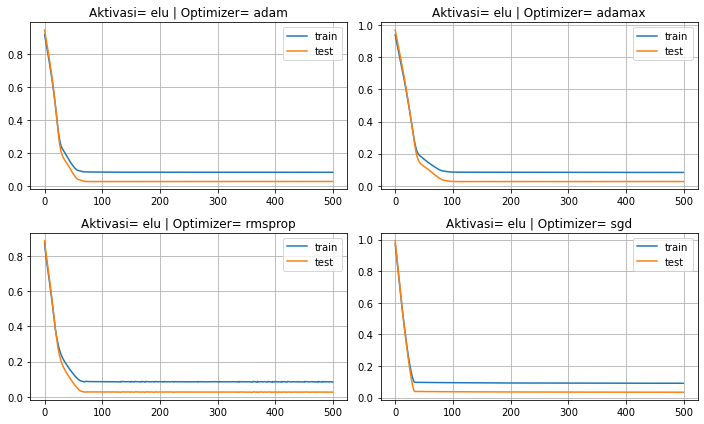

In [21]:
# deklarasi fungsi aktivasi
act_func = ['elu']

# deklarasi fungsi optimizer
act_opt = ['adam','adamax','rmsprop','sgd']


# membuat frame 
plt.figure(figsize=(10,6))

# inisialisasi perulangan
k = 0

# perulangan bersarang
for i in range(len(act_func)):
    for j in range(len(act_opt)):
        
        # increment 
        k+=1
        
        # subploting
        plt.subplot(2,2, k)
        plt.tight_layout()

        # call model loss
        model_loss1(train_X, train_y, test_X, test_y, act_func[i], act_opt[j])

# menampilkan hasil visualsasi
plt.show()

- softplus

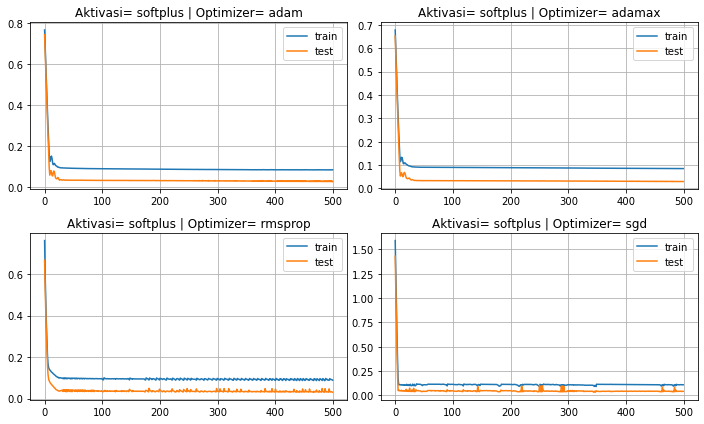

In [22]:
# deklarasi fungsi aktivasi
act_func = ['softplus']

# deklarasi fungsi optimizer
act_opt = ['adam','adamax','rmsprop','sgd']


# membuat frame 
plt.figure(figsize=(10,6))

# inisialisasi perulangan
k = 0

# perulangan bersarang
for i in range(len(act_func)):
    for j in range(len(act_opt)):
        
        # increment 
        k+=1
        
        # subploting
        plt.subplot(2,2, k)
        plt.tight_layout()

        # call model loss
        model_loss1(train_X, train_y, test_X, test_y, act_func[i], act_opt[j])

# menampilkan hasil visualsasi
plt.show()

### Eksperimen 1. Loss function

In [23]:
# deklarasi fungsi aktivasi
act_func = ['sigmoid','tanh','relu','selu','elu','softplus']

In [24]:
# deklarasi fungsi optimizer
act_opt = ['adam','adamax','rmsprop','sgd']

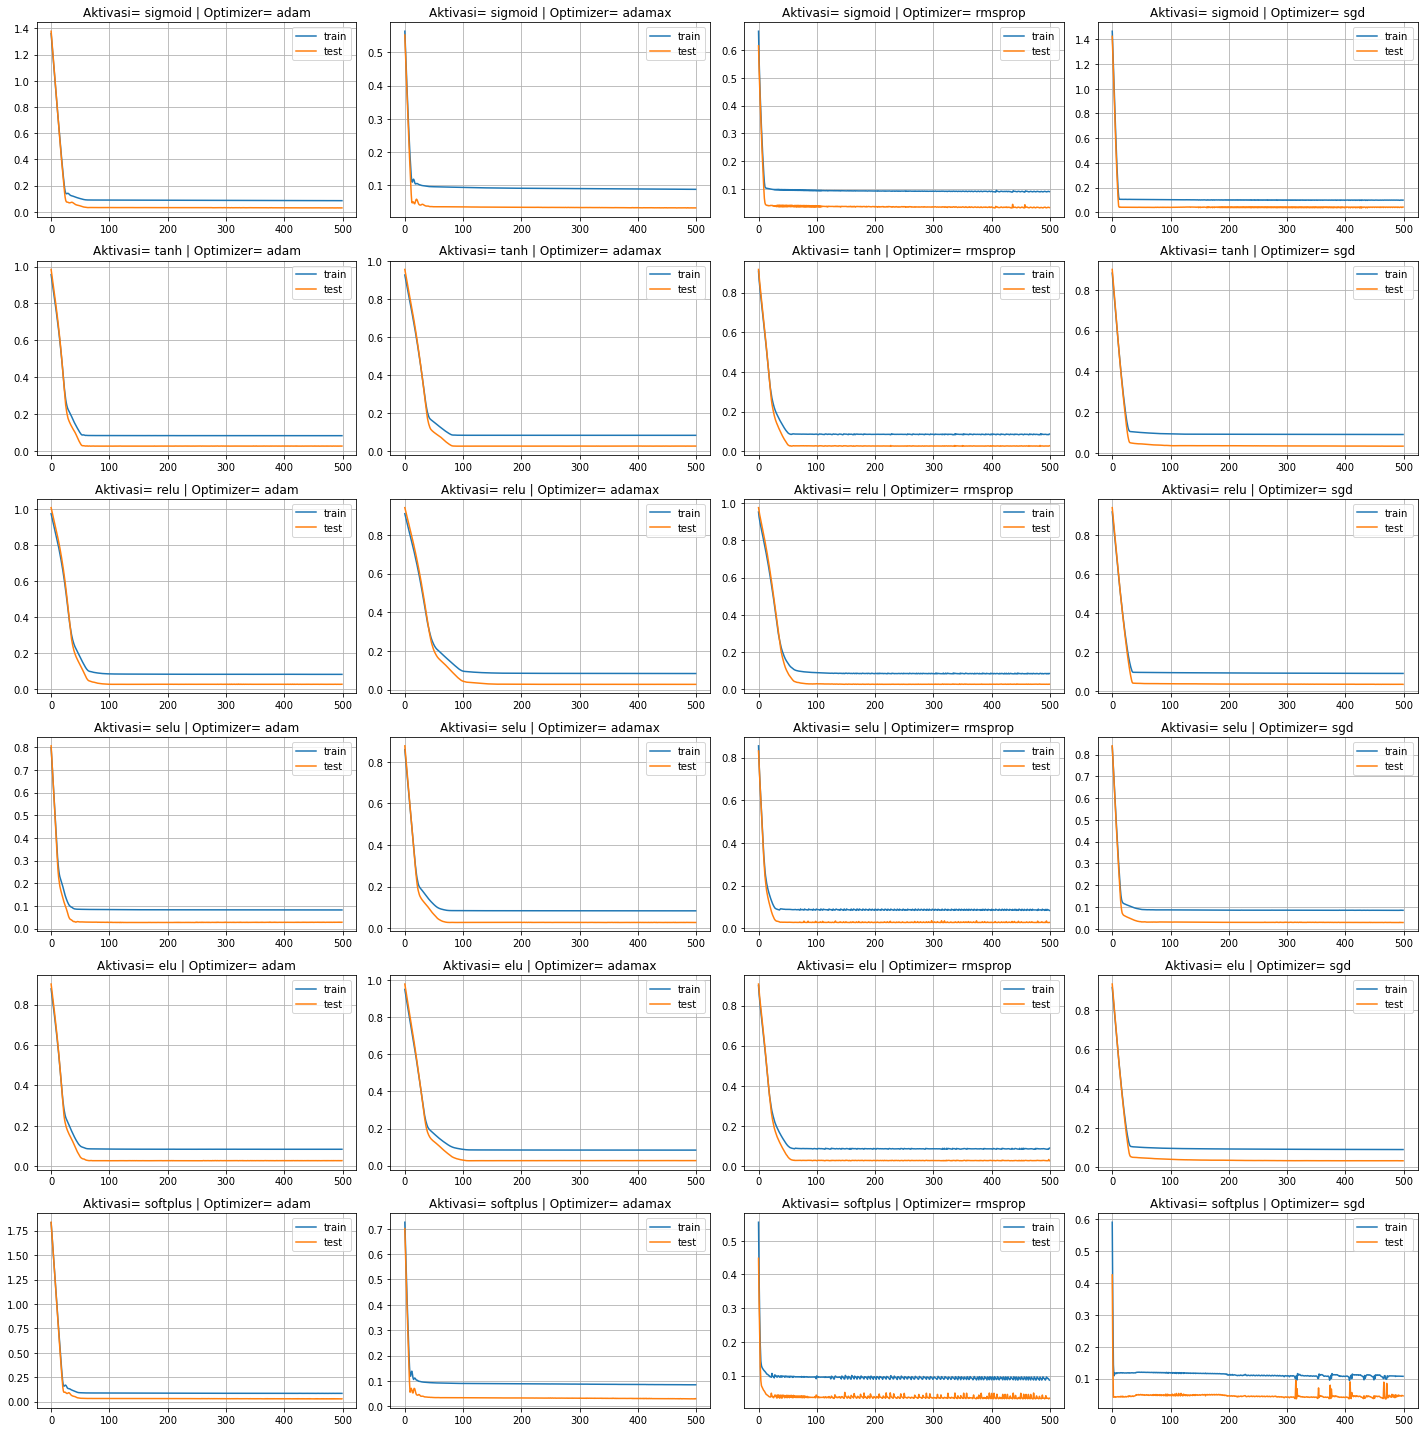

In [26]:
# membuat frame 
plt.figure(figsize=(20,20))

# inisialisasi perulangan
k = 0

# perulangan bersarang
for i in range(len(act_func)):
    for j in range(len(act_opt)):
        
        # increment 
        k+=1
        
        # subploting
        plt.subplot(6,4, k)
        plt.tight_layout()

        # call model loss
        model_loss1(train_X, train_y, test_X, test_y, act_func[i], act_opt[j])

# menampilkan hasil visualsasi
plt.show()

### Eksperimen 2. Pengaruh learning rate di Optimizers= Adam

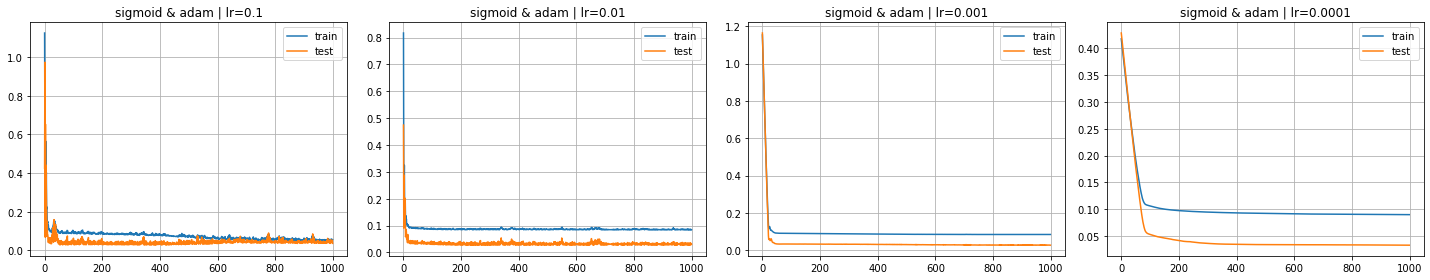

In [27]:
# deklarasi fungsi aktivasi
act_func = "sigmoid"

# deklarasi fungsi optimizer
act_opt = "adam"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()

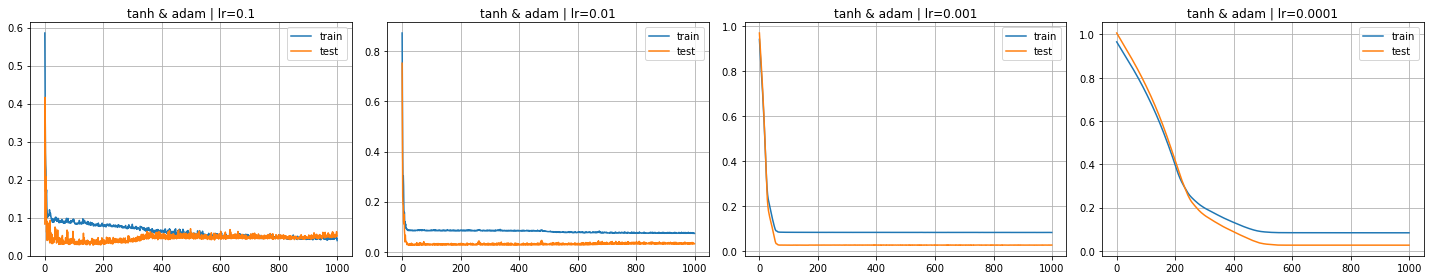

In [28]:
# deklarasi fungsi aktivasi
act_func = "tanh"

# deklarasi fungsi optimizer
act_opt = "adam"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()

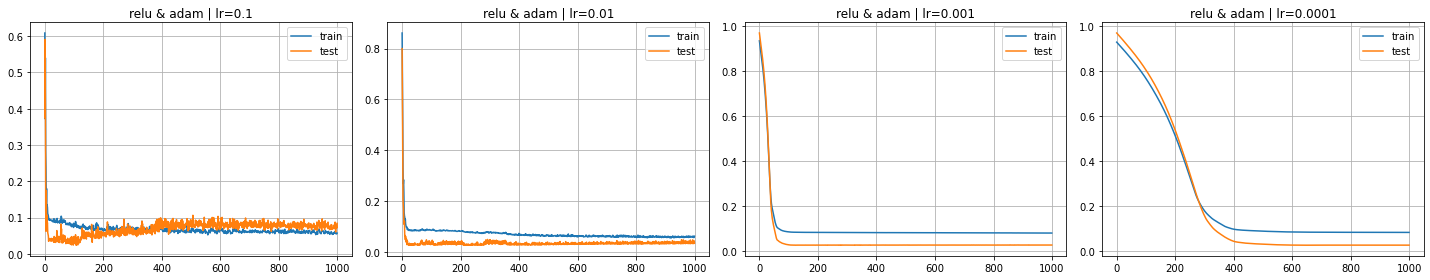

In [29]:
# deklarasi fungsi aktivasi
act_func = "relu"

# deklarasi fungsi optimizer
act_opt = "adam"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()

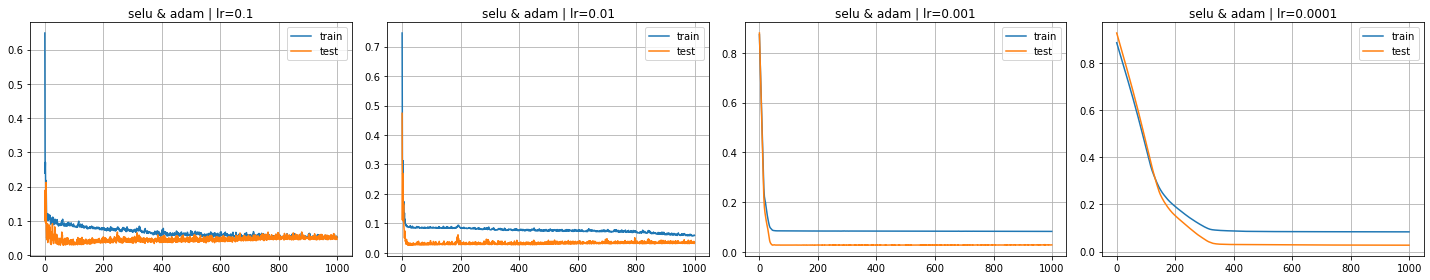

In [30]:
# deklarasi fungsi aktivasi
act_func = "selu"

# deklarasi fungsi optimizer
act_opt = "adam"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()

### Eksperimen 3. Pengaruh learning rate di Optimizers= RMSprop

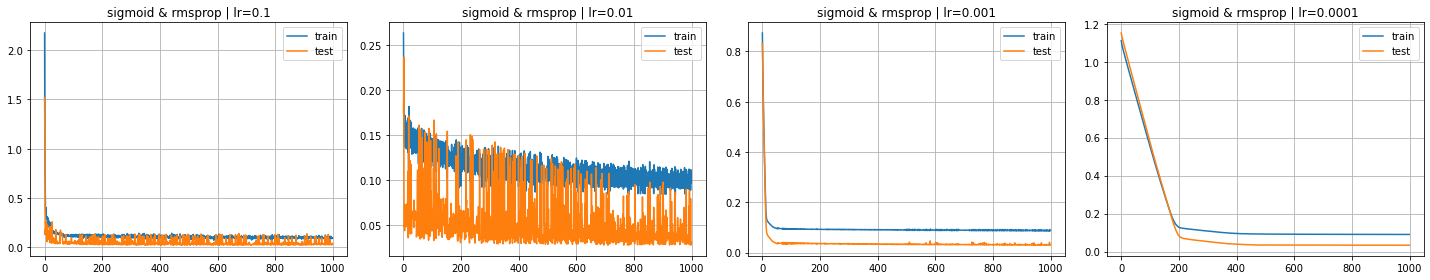

In [31]:
# deklarasi fungsi aktivasi
act_func = "sigmoid"

# deklarasi fungsi optimizer
act_opt = "rmsprop"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()

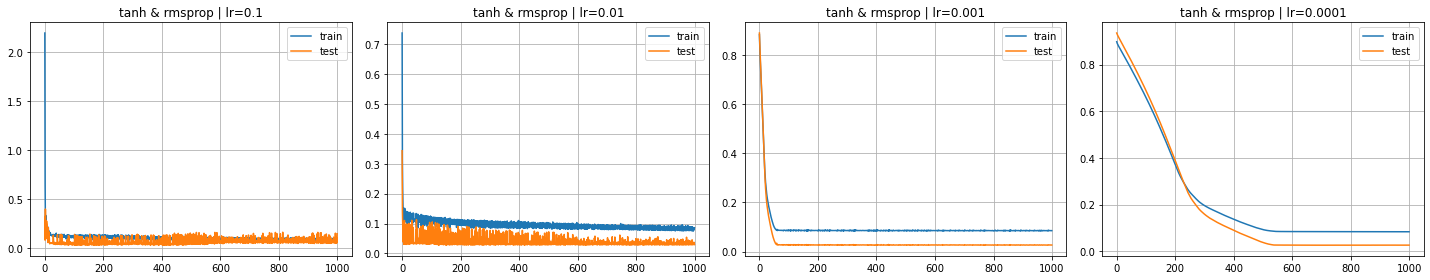

In [32]:
# deklarasi fungsi aktivasi
act_func = "tanh"

# deklarasi fungsi optimizer
act_opt = "rmsprop"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()

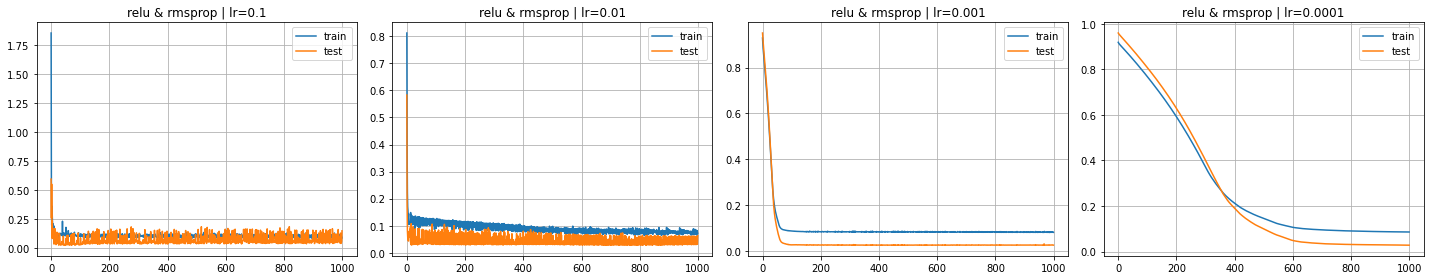

In [33]:
# deklarasi fungsi aktivasi
act_func = "relu"

# deklarasi fungsi optimizer
act_opt = "rmsprop"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()

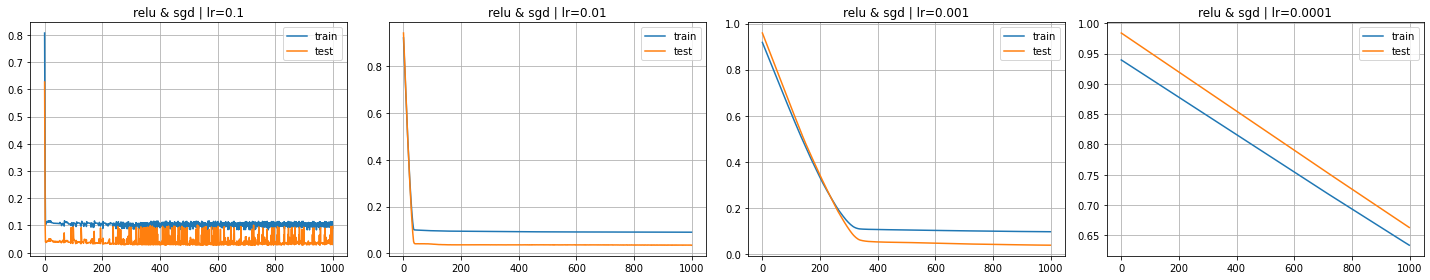

In [34]:
# deklarasi fungsi aktivasi
act_func = "relu"

# deklarasi fungsi optimizer
act_opt = "sgd"

# deklarasi learning_rate
act_lr = [0.1, 0.01, 0.001, 0.0001]

# membuat frame 
plt.figure(figsize=(20,4))

for i in range(len(act_lr)):
    
    # subploting
    plt.subplot(1, 4, i+1)
    
    # call model loss
    model_loss2(train_X, train_y, test_X, test_y, act_func, act_opt, act_lr[i])

# menampilkan hasil visualsasi
plt.tight_layout()
plt.show()